<html> <h1 style="font-style:bold; color:blue;"> Machine Learning in Finance </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-11 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> Credit Scoring </h2> </html>


#### This is a training example of credit scoring using the Kaggle.com Dataset
(https://www.kaggle.com/datasets/urvishvekariya/credit-risk-assessment/data)

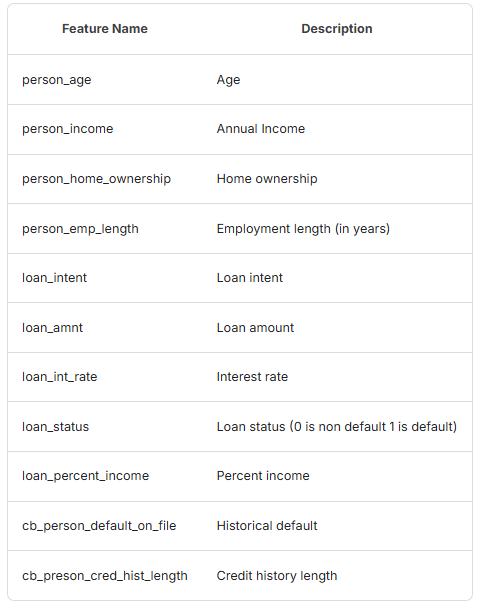

In [16]:
#pip install seaborn

______________________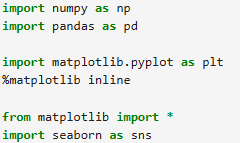

In [17]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import *
import seaborn as sns

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

___________________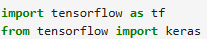

In [19]:
import tensorflow as tf
from tensorflow import keras

___________________

In [20]:
print(tf.__version__)

2.18.0


______________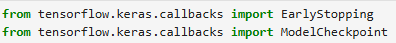

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

__________________

In [22]:
np.random.seed(42)

_____________________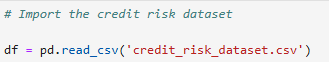

In [23]:
df=pd.read_csv("/Users/divyapolavarapu/Downloads/ML in finance-2/Week-11/credit_risk_dataset.csv")

____________________

In [24]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


__________________________

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_amnt                   32581 non-null  int64  
 6   loan_int_rate               29465 non-null  float64
 7   loan_status                 32581 non-null  int64  
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.7+ MB


<html> <h3 style="font-style:italic; color:blue;"> Data preprocessing </h3> </html>

___________________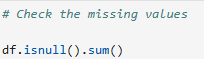

In [26]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [27]:
# Impute missing values with mean

imputer = SimpleImputer(strategy='mean')

df['person_emp_length'] = imputer.fit_transform(df[['person_emp_length']])
df['loan_int_rate'] = imputer.fit_transform(df[['loan_int_rate']])

____________________

In [28]:
df.isnull().sum()


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [29]:
# It doesn't have any NaN(s)

____________________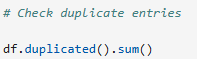

In [30]:
df.duplicated().sum()

165

_________________________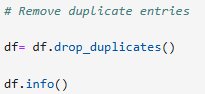

In [31]:
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32416 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           32416 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_amnt                   32416 non-null  int64  
 6   loan_int_rate               32416 non-null  float64
 7   loan_status                 32416 non-null  int64  
 8   loan_percent_income         32416 non-null  float64
 9   cb_person_default_on_file   32416 non-null  object 
 10  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 3.0+ MB


_______________________________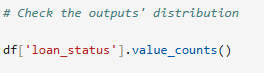

In [32]:
df['loan_status'].value_counts()

loan_status
0    25327
1     7089
Name: count, dtype: int64

__________________________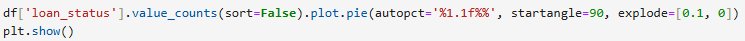

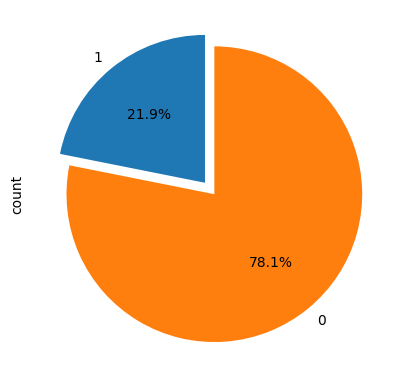

In [33]:
df['loan_status'].value_counts(sort=False).plot.pie(autopct='%1.1f%%',startangle=90,explode=[0.1,0])
plt.show()

In [34]:
# The dataset is unbalanced

_____________________________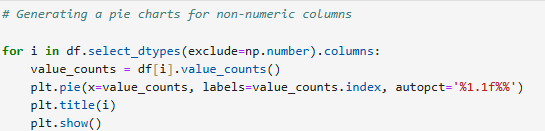

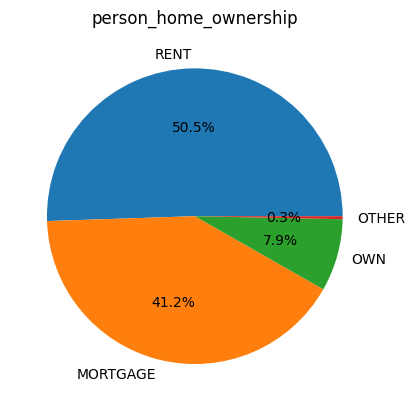

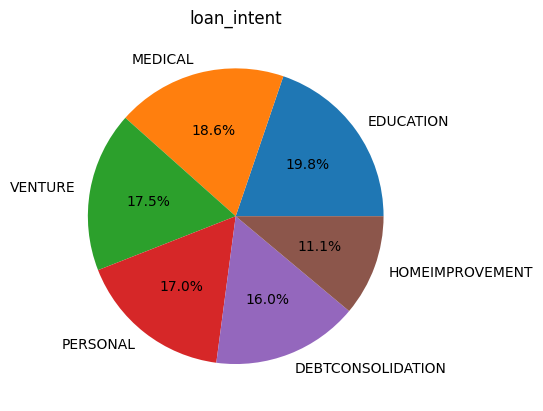

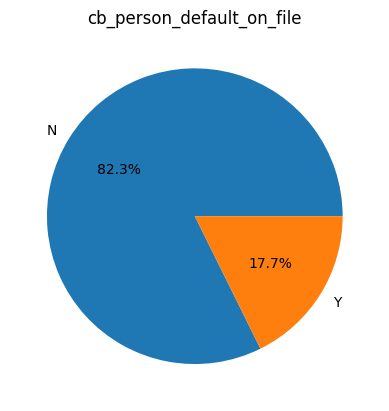

In [35]:
for i in df.select_dtypes(exclude=np.number).columns:
    value_counts=df[i].value_counts()
    plt.pie(x=value_counts,labels=value_counts.index,autopct='%1.1f%%')
    plt.title(i)
    plt.show()

_____________________________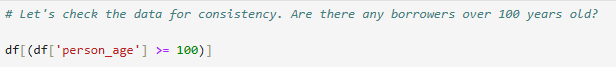

In [36]:
df[(df['person_age']>=100)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,4800,13.570000,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,6000,11.860000,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,20400,10.250000,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,20000,11.011695,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,5000,12.730000,0,0.00,N,25


#### Now just press 'CTRL' and 'ENTER' keys on the 3 next cells.

In [37]:
# For this analysis, all data entries with age 100 and above can be disregarded. This is not of importance

df = df.drop(df[(df['person_age'] >= 100)].index)

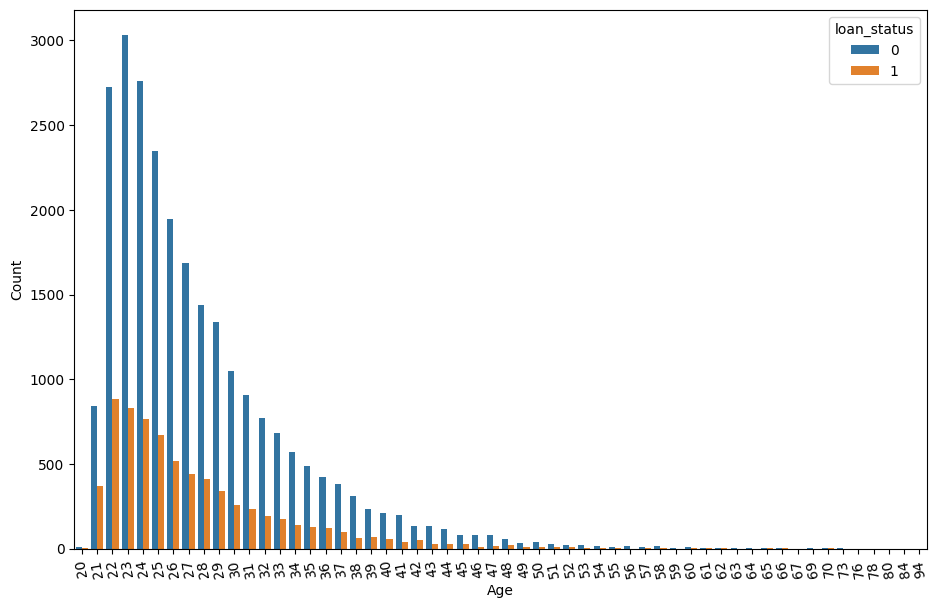

In [38]:
fig = plt.figure(figsize=(11, 7))
sns.countplot(data = df, x = 'person_age', hue = 'loan_status')

plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=100)
plt.show();

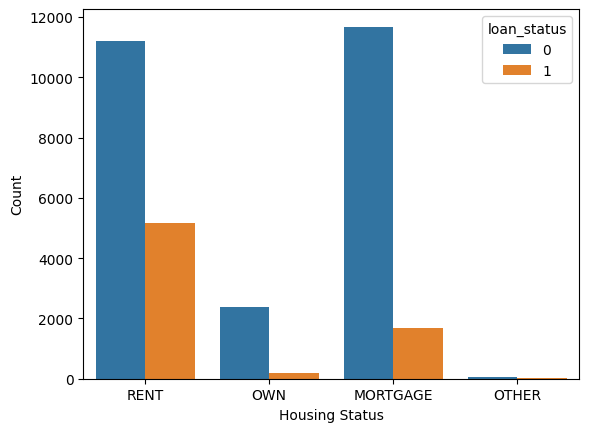

In [39]:
sns.countplot(data = df, x = 'person_home_ownership', hue = 'loan_status')

plt.xlabel('Housing Status')
plt.ylabel('Count')
plt.show();

In [40]:
# Renters often default on loans, homeowners rarely do

______________________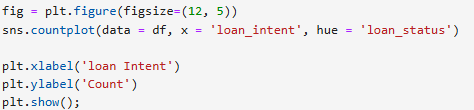

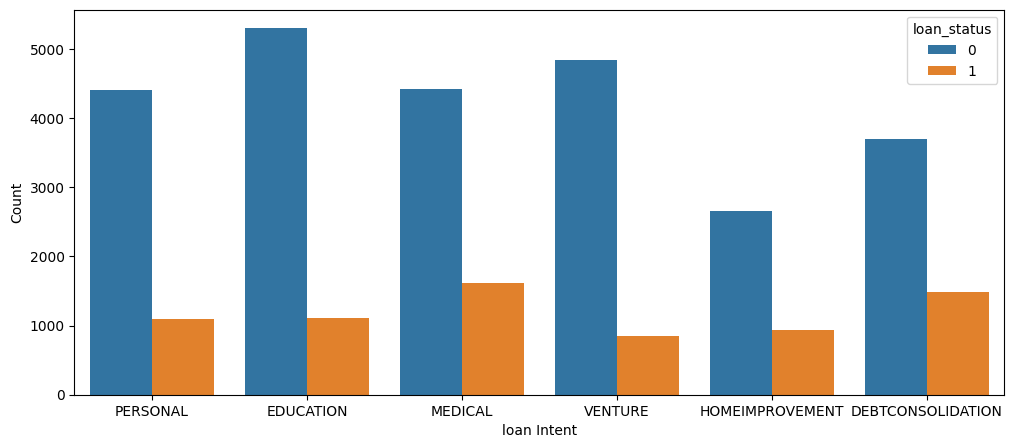

In [41]:
fig=plt.figure(figsize=(12,5))
sns.countplot(data=df,x='loan_intent',hue='loan_status')

plt.xlabel('loan Intent')
plt.ylabel('Count')
plt.show();

In [42]:
# Medical loans and Debt-Consolidation loans are more risky

________________________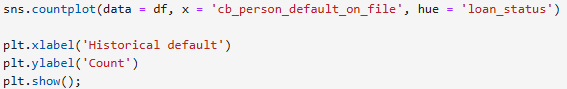

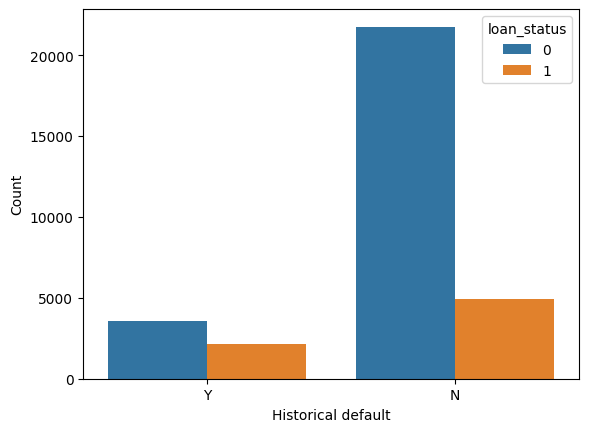

In [43]:
sns.countplot(data=df,x='cb_person_default_on_file',hue='loan_status')

plt.xlabel('Historical default')
plt.ylabel('Count')
plt.show();

In [44]:
# Those who have defaulted on loans in the past are highly likely to default on a new loan

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [45]:
# transform categorical variables into integers

for colname in df.select_dtypes("object"):
    df[colname], _ = df[colname].factorize()

For Categorical variables with more than 2 variants, it is more correct to use the one-hot encoding method. 

 Detailed description is here:

https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.OneHotEncoder.html

______________________

In [46]:
df.head(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,0,123.0,0,35000,16.02,1,0.59,0,3
1,21,9600,1,5.0,1,1000,11.14,0,0.10,1,2
2,25,9600,2,1.0,2,5500,12.87,1,0.57,1,3


_________________________

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32411 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32411 non-null  int64  
 1   person_income               32411 non-null  int64  
 2   person_home_ownership       32411 non-null  int64  
 3   person_emp_length           32411 non-null  float64
 4   loan_intent                 32411 non-null  int64  
 5   loan_amnt                   32411 non-null  int64  
 6   loan_int_rate               32411 non-null  float64
 7   loan_status                 32411 non-null  int64  
 8   loan_percent_income         32411 non-null  float64
 9   cb_person_default_on_file   32411 non-null  int64  
 10  cb_person_cred_hist_length  32411 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 3.0 MB


<html> <h3 style="font-style:italic; color:blue;"> Heat Map</h3> </html>

___________________________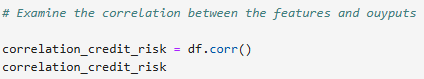

In [48]:
correlation_credit_risk=df.corr()
correlation_credit_risk

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
person_age,1.000000,0.140393,0.032486,0.164081,0.026672,0.051460,0.010513,-0.021808,-0.041546,-0.006537,0.878238
person_income,0.140393,1.000000,0.231399,0.150957,0.024362,0.316717,-0.001063,-0.169284,-0.294732,0.002562,0.122612
person_home_ownership,0.032486,0.231399,1.000000,0.228437,0.017222,0.129275,-0.131836,-0.218461,-0.135102,0.061586,0.025462
person_emp_length,0.164081,0.150957,0.228437,1.000000,0.016314,0.111931,-0.053068,-0.081290,-0.052950,0.027730,0.142884
loan_intent,0.026672,0.024362,0.017222,0.016314,1.000000,0.018932,0.006208,0.065827,-0.002263,-0.010578,0.016466
loan_amnt,0.051460,0.316717,0.129275,0.111931,0.018932,1.000000,0.139670,0.105771,0.572779,-0.039365,0.042018
loan_int_rate,0.010513,-0.001063,-0.131836,-0.053068,0.006208,0.139670,1.000000,0.320099,0.114513,-0.477082,0.014970
loan_status,-0.021808,-0.169284,-0.218461,-0.081290,0.065827,0.105771,0.320099,1.000000,0.379704,-0.179354,-0.016473
loan_percent_income,-0.041546,-0.294732,-0.135102,-0.052950,-0.002263,0.572779,0.114513,0.379704,1.000000,-0.036170,-0.031281
cb_person_default_on_file,-0.006537,0.002562,0.061586,0.027730,-0.010578,-0.039365,-0.477082,-0.179354,-0.036170,1.000000,-0.004199


#### Now just press 'CTRL' and 'ENTER' keys on the 3 next cells.

In [49]:
corr_order = df.corr()[['loan_status']].sort_values(by='loan_status', ascending=False)
corr_order

,loan_status
loan_status,1.000000
loan_percent_income,0.379704
loan_int_rate,0.320099
loan_amnt,0.105771
loan_intent,0.065827
cb_person_cred_hist_length,-0.016473
person_age,-0.021808
person_emp_length,-0.081290
person_income,-0.169284
cb_person_default_on_file,-0.179354


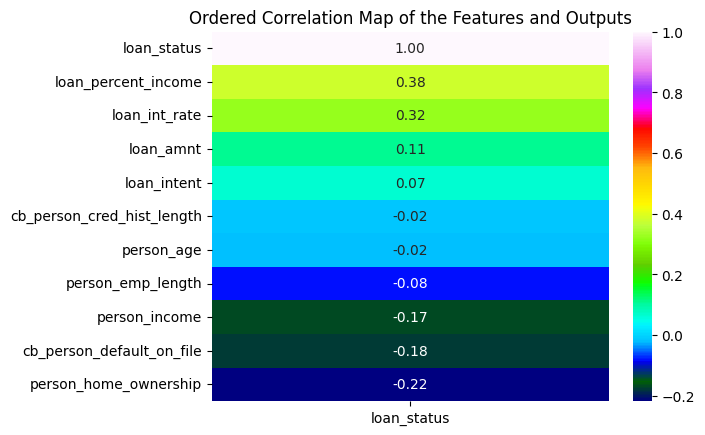

In [50]:
# Heat map for correlations with outputs

sns.heatmap(corr_order, annot=True, fmt='.2f', cmap='gist_ncar')
plt.title('Ordered Correlation Map of the Features and Outputs')
plt.show()

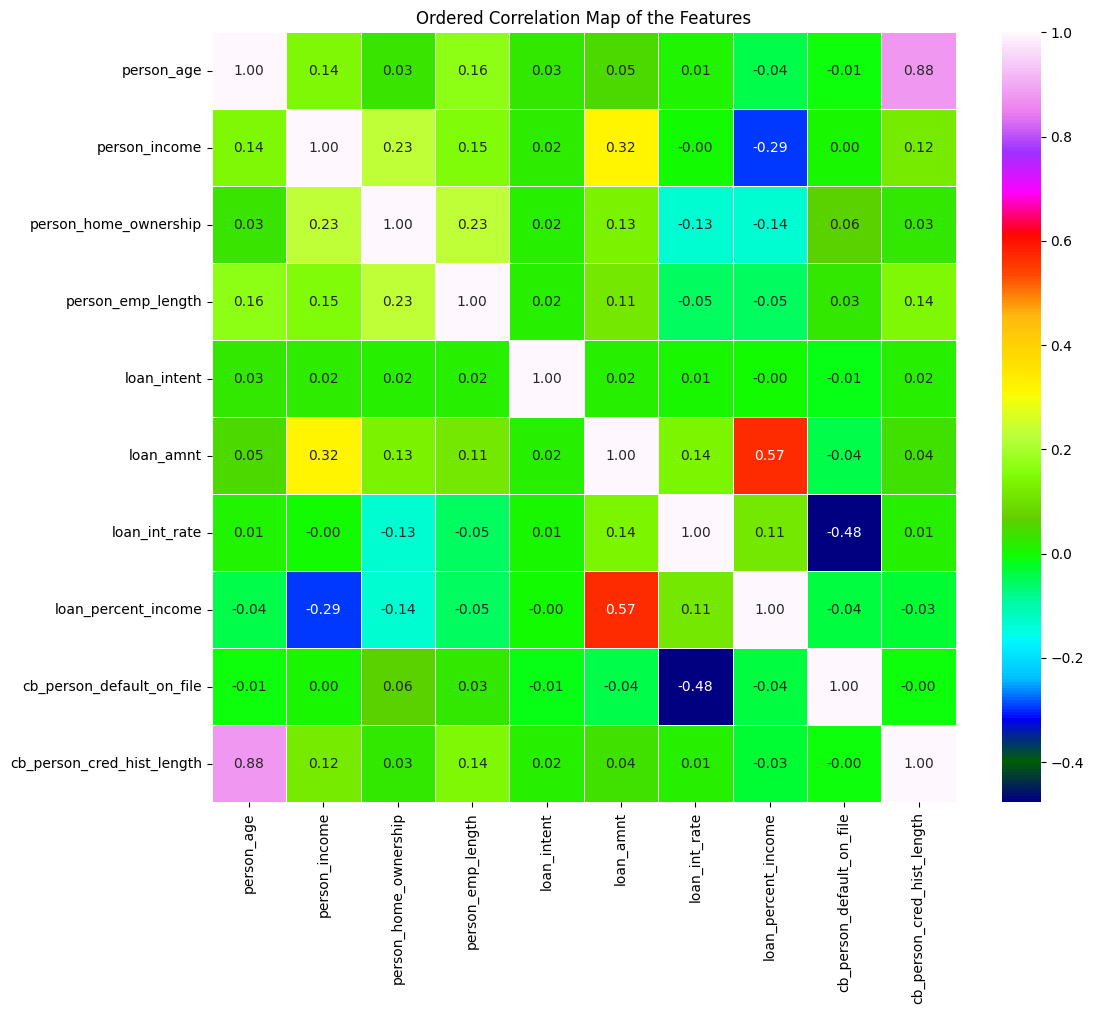

In [51]:
# Heat map for features without outputs

plt.figure(figsize=(12,10))
corr_order_without_target = df.drop('loan_status', axis=1).corr()
sns.heatmap(corr_order_without_target, annot=True, fmt='.2f', annot_kws={"size": 10}, cbar=True, linewidths=0.5, cmap='gist_ncar')
plt.title('Ordered Correlation Map of the Features')
plt.show()

______________________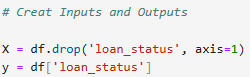

In [52]:
X=df.drop('loan_status',axis=1)
y=df['loan_status']

___________________________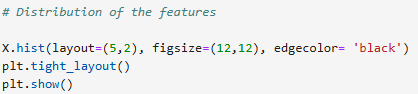

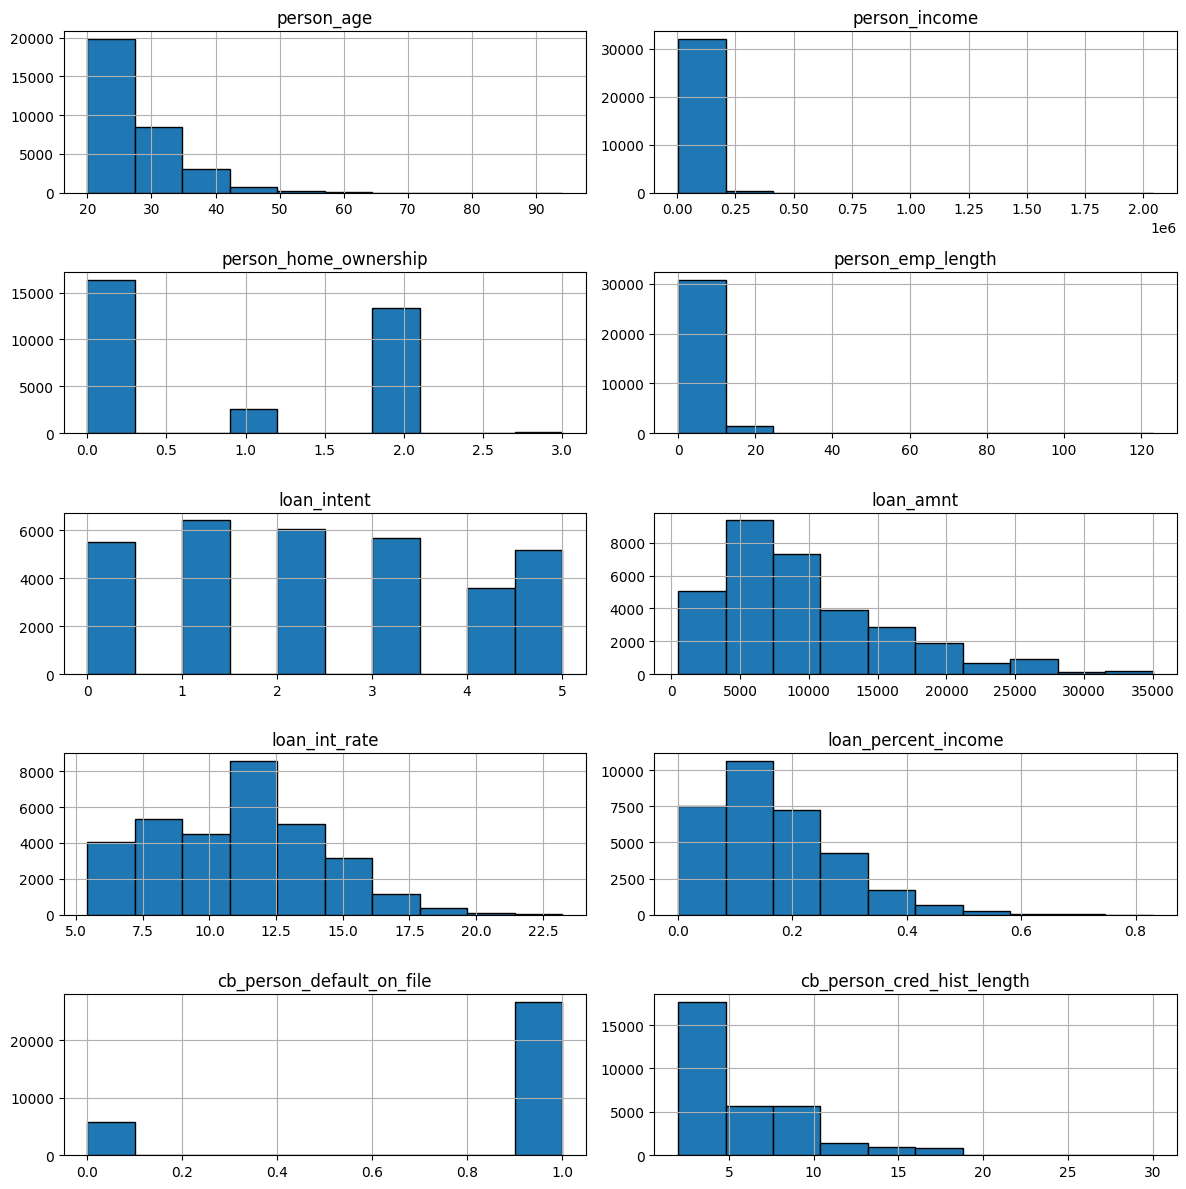

In [53]:
X.hist(layout=(5,2),figsize=(12,12),edgecolor= 'black')
plt.tight_layout()
plt.show()

#### Now just press 'CTRL' and 'ENTER' keys on the 2 next cells.

In [54]:
# Splitting the datasets into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# changing the distribution of values so that the mean of the observed values is -0- 
# and the standard deviation is 1.

scaler = StandardScaler()
X_train_imb = scaler.fit_transform(X_train)
X_test_imb =  scaler.transform (X_test)

___________________________

In [56]:
X_train_imb.shape

(25928, 10)

<html> <h3 style="font-style:italic; color:blue;"> Multi Layer Perceptron (MLP) </h3> </html>

____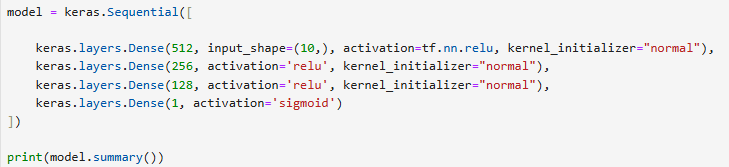

In [57]:
model = keras.Sequential([
    keras.layers.Dense(512,input_shape=(10,),activation=tf.nn.relu,kernel_initializer="normal"),
    keras.layers.Dense(256,activation='relu',kernel_initializer="normal"),
    keras.layers.Dense(128,activation='relu',kernel_initializer="normal"),
    keras.layers.Dense(1,activation='sigmoid')

])

print (model.summary())

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │         5,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169,985 (664.00 KB)

 Trainable params: 169,985 (664.00 KB)

 Non-trainable params: 0 (0.00 B)

None


____________________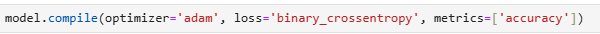

In [58]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

__________________________

In [59]:
mc=ModelCheckpoint('best_model_MLP.keras',monitor='val_loss',mode='min',verbose=1,save_best_only=True)

___________________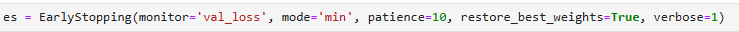

In [60]:
es=EarlyStopping(monitor='val_loss',mode='min',patience=10,restore_best_weights=True,verbose=1)

<html> <h4 style="font-style:bold; color:blue;"> If you are using your own laptop without a GPU (Graphics processing unit), 

please change the following parameter in the next cell 

epochs=10
</h4> </html>

__________________________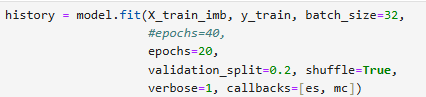

In [61]:
history=model.fit(X_train_imb,y_train,batch_size=32,
                 epochs=20,
                 validation_split=0.2,shuffle=True,
                 verbose=1,callbacks=[es,mc])

Epoch 1/20
628/649 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8330 - loss: 0.3935
Epoch 1: val_loss improved from inf to 0.32311, saving model to best_model_MLP.keras
649/649 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8336 - loss: 0.3924 - val_accuracy: 0.8739 - val_loss: 0.3231
Epoch 2/20
623/649 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8723 - loss: 0.3256
Epoch 2: val_loss improved from 0.32311 to 0.31670, saving model to best_model_MLP.keras
649/649 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8723 - loss: 0.3256 - val_accuracy: 0.8739 - val_loss: 0.3167
Epoch 3/20
625/649 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8750 - loss: 0.3209
Epoch 3: val_loss improved from 0.31670 to 0.30022, saving model to best_model_MLP.keras
649/649 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8751 - loss: 0.3207 - val_accuracy: 0.8810 - val_loss: 0.3002
Epoch 4/20
625/649 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8858 - loss: 0.3012
Epoch 4: val_loss did not improve from 0.3

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

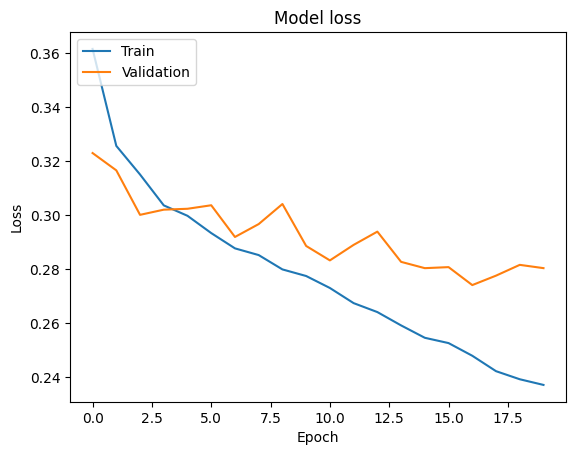

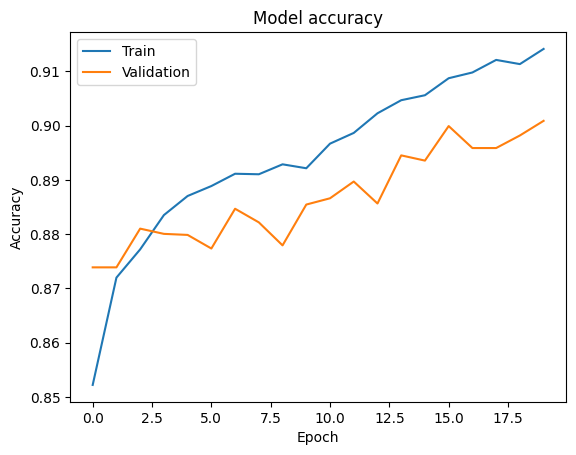

In [62]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

_______________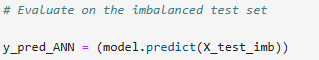

In [63]:
y_pred_ANN=(model.predict(X_test_imb))

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step


#### Now just press 'CTRL' and 'ENTER' keys on the 2 next cells.

In [64]:
print(y_pred_ANN[:10])
y_pred_ANN_labels = (y_pred_ANN >= 0.5).astype(int)

[[0.07470158]
 [0.01081633]
 [0.00946822]
 [0.1179532 ]
 [0.25591385]
 [1.        ]
 [0.00479321]
 [0.14713722]
 [0.10515984]
 [0.0744561 ]]


Imbalanced MLP Dataset Results
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5080
           1       0.88      0.62      0.73      1403

    accuracy                           0.90      6483
   macro avg       0.89      0.80      0.83      6483
weighted avg       0.90      0.90      0.89      6483



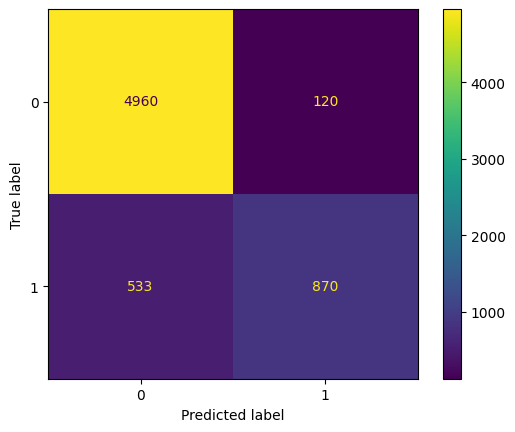

In [65]:
print("Imbalanced MLP Dataset Results")
print(classification_report(y_test, y_pred_ANN_labels))

# Confusion matrix for ANN
cm = confusion_matrix(y_test, y_pred_ANN_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

<html> <h3 style="font-style:italic; color:blue;"> Random Forest </h3> </html>

____________________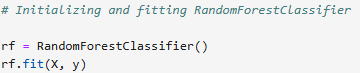

In [66]:
rf=RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

_______________________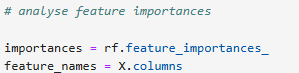

In [67]:
importances=rf.feature_importances_
feature_names=X.columns

#### Now just press 'CTRL' and 'ENTER' keys on the 4 next cells.

In [68]:
# Sort feature importances in descending order

indices = np.argsort(importances)[::-1]

In [69]:
# Print feature ranking

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature loan_percent_income (0.229421)
2. feature loan_int_rate (0.191832)
3. feature person_income (0.163645)
4. feature person_home_ownership (0.100359)
5. feature loan_amnt (0.080432)
6. feature loan_intent (0.065423)
7. feature person_emp_length (0.063226)
8. feature person_age (0.049591)
9. feature cb_person_cred_hist_length (0.039999)
10. feature cb_person_default_on_file (0.016072)


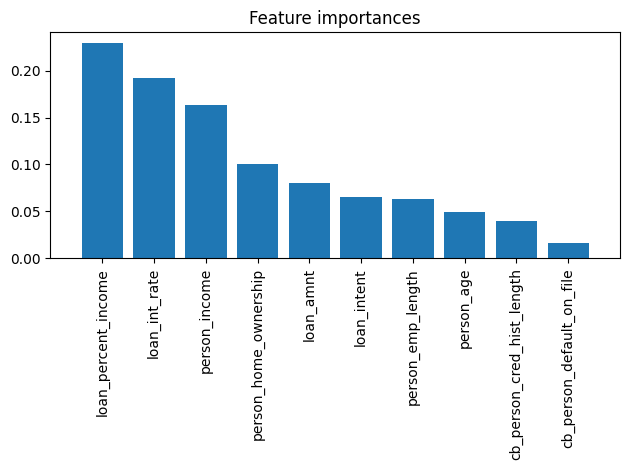

In [70]:
# Plot feature importances

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

In [71]:
# Random Forest

new_random = RandomForestClassifier(n_estimators=200,
                                criterion='gini',
                                max_features='sqrt',
                                max_depth=10,
                                min_samples_split=5,
                                min_samples_leaf=2,
                                random_state=42)

new_random.fit(X_train_imb, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

______________________

In [72]:
y_pred_random=new_random.predict(X_test_imb)

__________________________

In [73]:
print(classification_report(y_test,y_pred_random))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5080
           1       0.94      0.64      0.76      1403

    accuracy                           0.91      6483
   macro avg       0.92      0.82      0.86      6483
weighted avg       0.92      0.91      0.91      6483



#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

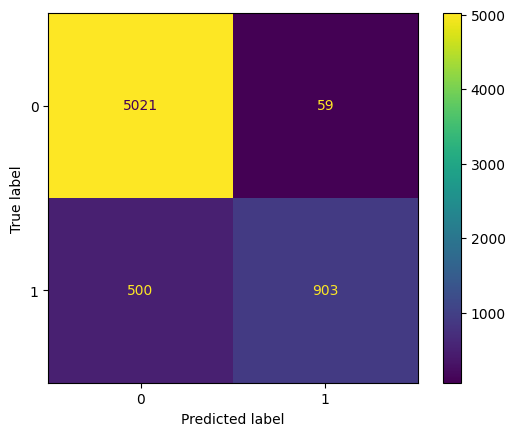

In [74]:
# Confusion matrix for Random Forest

cm_random = confusion_matrix(y_test, y_pred_random)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_random, display_labels=[0, 1])
disp_rf.plot()
plt.show();


<html> <h3 style="font-style:italic; color:blue;"> Logistic Regression </h3> </html>

#### Now just press 'CTRL' and 'ENTER' keys on the 4 next cells.

In [75]:
# Feature selection

# This is a meta-transformer that can be used with any model that assigns importance to each feature 
# through a specific importance_getter attribute called after training

feature_selector = SelectFromModel(LogisticRegression())
X_train_selected = feature_selector.fit_transform(X_train_imb, y_train)
X_test_selected = feature_selector.transform(X_test_imb)


In [76]:
# Defining the parameter grid for grid search

param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [77]:
# Perform grid search with cross-validation

grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000), 
                           param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_imb, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1.0, 10.0], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [78]:
# Print the best parameters and the best cross-validation score

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_:.2f}')

Best parameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation score: 0.84


______________________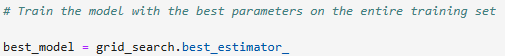

In [79]:
best_model=grid_search.best_estimator_

_________________________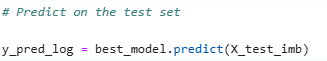

In [80]:
y_pred_log=best_model.predict(X_test_imb)

_________________________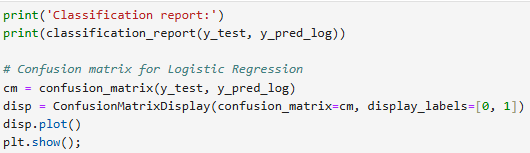

classification report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5080
           1       0.72      0.43      0.53      1403

    accuracy                           0.84      6483
   macro avg       0.79      0.69      0.72      6483
weighted avg       0.83      0.84      0.82      6483



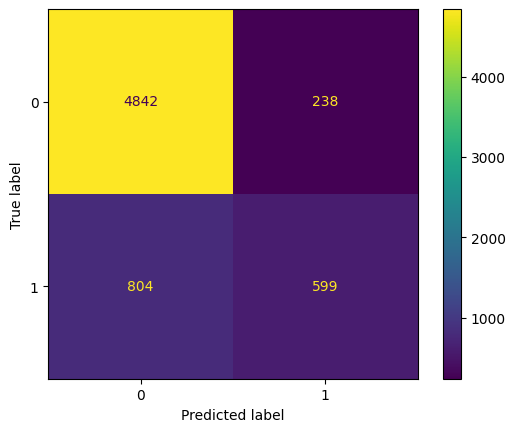

In [81]:
print('classification report:')
print(classification_report(y_test,y_pred_log))

cm=confusion_matrix(y_test,y_pred_log)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot()
plt.show();

<html> <h3 style="font-style:italic; color:blue;"> Model Performance and Results Visualisation </h3> </html>

#### Now just press 'CTRL' and 'ENTER' keys on the 2next cells.

In [82]:
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score, roc_auc_score

In [83]:
imbalance_ai_models = ['Random Forest', 'Logistic Regression', 'MLP']
prediction_imb = [y_pred_random, y_pred_log, y_pred_ANN]

__________________________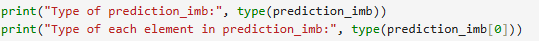

In [84]:
print("Type of prediction_imb:", type(prediction_imb))
print("Type of each element in prediction in prediction_imb:",type(prediction_imb[0]))

Type of prediction_imb: <class 'list'>
Type of each element in prediction in prediction_imb: <class 'numpy.ndarray'>


_________________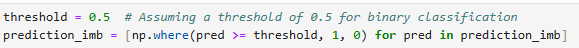

In [85]:
threshold=0.5
prediction_imb=[np.where(pred>=threshold,1,0)for pred in prediction_imb]

#### Now just press 'CTRL' and 'ENTER' keys on the 3 next cells.

In [86]:
accuracy_imb = []
precision_imb = []
recall_imb =[]
f1_imb = []
auc_imb = []
for x in range(0, len(prediction_imb)):
    acc_score = np.round(accuracy_score(y_test, prediction_imb[x]) * 100, 2)
    accuracy_imb.append(acc_score)
    pre_score = np.round(precision_score(y_test, prediction_imb[x], average='weighted') * 100, 2)
    precision_imb.append(pre_score)
    rc_score = np.round(recall_score(y_test, prediction_imb[x], average='weighted') * 100, 2)
    recall_imb.append(rc_score)
    f_score = np.round(f1_score(y_test, prediction_imb[x], average='weighted') * 100, 2)
    f1_imb.append(f_score)
    auc_sc = np.round(roc_auc_score(y_test, prediction_imb[x]) * 100, 2)
    auc_imb.append(auc_sc)

In [87]:
model_perform_imb  = {'Imbalance AI Models':imbalance_ai_models,
              'Accuracy':accuracy_imb,
               'Precision':precision_imb,
               'Recall':recall_imb,
               'F1-Score':f1_imb,
               'AUC':auc_imb
              }
model_data_imb  = pd.DataFrame(model_perform_imb)
print('Result of testing with an Imbalanced Dataset')
model_data_imb

Result of testing with an Imbalanced Dataset


,Imbalance AI Models,Accuracy,Precision,Recall,F1-Score,AUC
0,Random Forest,91.38,91.58,91.38,90.75,81.60
1,Logistic Regression,83.93,82.69,83.93,82.32,69.00
2,MLP,89.93,89.77,89.93,89.26,79.82


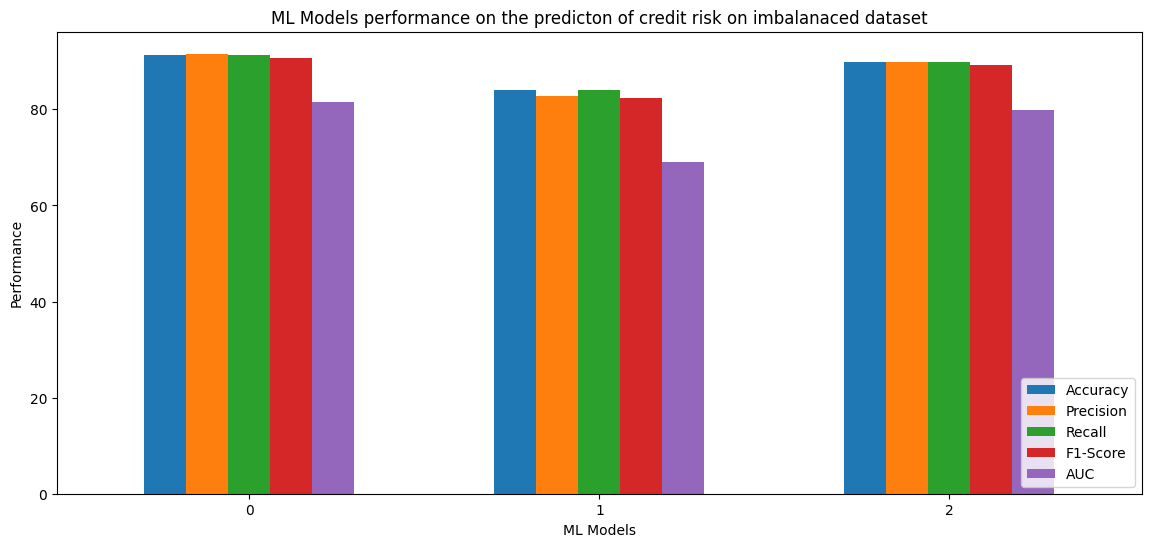

In [88]:
model_imb = model_data_imb.set_index('Imbalance AI Models')

model_data_imb.plot(kind='bar', figsize=(14,6), width=0.6)
plt.title('ML Models performance on the predicton of credit risk on imbalanaced dataset')
plt.ylabel('Performance')
plt.xlabel('ML Models')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

# Lab Logbook Requirement:

<html> <h3 style="font-style:italic; color:blue;">
   
1) Create and train your own LSTM model
2) Add all the LSTM's Error metrics: Accuracy, Precision, Recall, F1-Score and AUC to the final histogram "ML Models performance...".

</h3> </html>

<html> <h3 style="color:red;">
NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.
</h3> </html>

Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


815/815 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - accuracy: 0.7901 - loss: 0.5064 - val_accuracy: 0.8369 - val_loss: 0.3743
Epoch 2/10
815/815 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.8492 - loss: 0.3648 - val_accuracy: 0.8553 - val_loss: 0.3539
Epoch 3/10
815/815 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.8647 - loss: 0.3389 - val_accuracy: 0.8624 - val_loss: 0.3441
Epoch 4/10
815/815 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.8636 - loss: 0.3392 - val_accuracy: 0.8624 - val_loss: 0.3398
Epoch 5/10
815/815 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.8678 - loss: 0.3303 - val_accuracy: 0.8657 - val_loss: 0.3339
Epoch 6/10
815/815 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.8694 - loss: 0.3222 - val_accuracy: 0.8679 - val_loss: 0.3294
Epoch 7/10
815/815 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.8699 - loss: 0.3227 - val_accuracy: 0.8720 - val_loss: 0.3256
Epoch 8/10
815/815 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.8751 - loss: 0.3143 - val_accurac

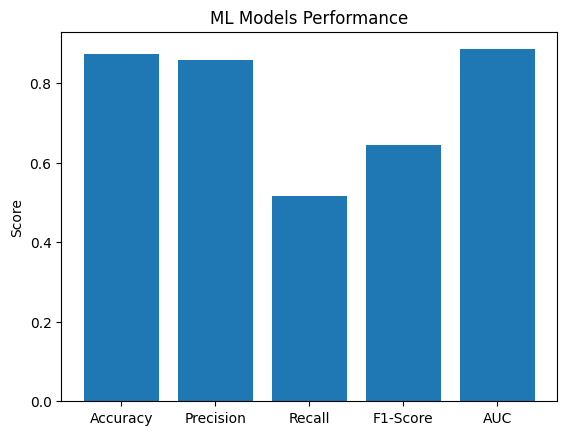

In [90]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt


credit_data = pd.read_csv("/Users/divyapolavarapu/Downloads/ML in finance-2/Week-11/credit_risk_dataset.csv")


credit_data['person_home_ownership'] = LabelEncoder().fit_transform(credit_data['person_home_ownership'])
credit_data['loan_intent'] = LabelEncoder().fit_transform(credit_data['loan_intent'])
credit_data['cb_person_default_on_file'] = LabelEncoder().fit_transform(credit_data['cb_person_default_on_file'])


credit_data.fillna(credit_data.median(), inplace=True)


X = credit_data.drop('loan_status', axis=1).values
y = credit_data['loan_status'].values


scaler = StandardScaler()
X = scaler.fit_transform(X)


X = X.reshape((X.shape[0], 1, X.shape[1]))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'),
    Dense(1, activation='sigmoid') 
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, y_test))


y_pred = (model.predict(X_test) > 0.5).astype(int)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, model.predict(X_test))


metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'AUC': auc
}


plt.bar(metrics.keys(), metrics.values())
plt.title("ML Models Performance")
plt.ylabel("Score")
plt.show()
